# Crop Yield Prediction with XGBoost

## Load Packages

In [20]:
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets
import xgboost as xgb  # Import XGBoost for building gradient boosting models
from sklearn.model_selection import GridSearchCV, KFold  # Import GridSearchCV for hyperparameter tuning and KFold for cross-validation
from sklearn.metrics import mean_squared_error  # Import function to evaluate model performance using MSE

In [21]:
Data = pd.read_csv('DataFinal_Agro.csv')
Data.head()

,ID,ANIO,CCDD,CCPP,CCDI,CONGLOMERADO,LAT,LONG,NSELUA,P102_1,...,PREC_ACEL_8,NDVI_ACEL_9,TEMP_ACEL_9,PREC_ACEL_9,NDVI_ACEL_10,TEMP_ACEL_10,PREC_ACEL_10,NDVI_ACEL_11,TEMP_ACEL_11,PREC_ACEL_11
0,1,2018,1,2,3,5198,-5.67605,-78.43803,99,1,...,9.882274,0.082962,-1.015000,12.184968,0.143937,-0.317500,12.184968,0.108902,0.612500,12.184968
1,2,2018,1,7,2,5318,-5.80688,-78.21937,36,1,...,9.634826,-0.021525,-0.997500,9.884700,-0.016575,0.452500,9.884700,-0.012863,3.010000,9.542317
2,3,2018,1,7,2,5318,-5.80688,-78.21937,65,1,...,9.634826,-0.021525,-0.997500,9.884700,-0.016575,0.452500,9.884700,-0.012863,3.010000,9.542317
3,4,2017,1,7,2,5318,-5.80688,-78.21937,20,1,...,41.332894,-0.202041,2.742468,53.967290,-0.061696,-1.460714,53.967290,-0.036493,-2.170000,53.967290
4,5,2018,1,2,3,5198,-5.67605,-78.43803,31,1,...,3.484605,0.139056,-0.347083,4.594935,0.206369,-0.347083,4.594935,0.086181,-0.347083,4.594935


## Inputation

In [22]:
columnas_a_imputar = ['P211_1', 'P211_2', 'P211_4', 'P212', 'P213', 'P214']

In [23]:
for col in columnas_a_imputar:
    Data[col].fillna(Data[col].mode()[0], inplace=True)

<ipython-input-23-afc02f4f86d6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data[col].fillna(Data[col].mode()[0], inplace=True)
<ipython-input-23-afc02f4f86d6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

## Feature Engineering

In [24]:
VarUtilizadas = [
'NDVI_S_0',
 'NDVI_S_1',
 'NDVI_S_2',
 'NDVI_S_3',
 'NDVI_S_4',
 'NDVI_S_5',
 'NDVI_S_6',
 'NDVI_S_7',
 'NDVI_S_8',
 'NDVI_S_9',
 'NDVI_S_10',
 'NDVI_S_11',
 'NDVI_S_12',
 'TEMP_S_0',
 'TEMP_S_1',
 'TEMP_S_2',
 'TEMP_S_3',
 'TEMP_S_4',
 'TEMP_S_5',
 'TEMP_S_6',
 'TEMP_S_7',
 'TEMP_S_8',
 'TEMP_S_9',
 'TEMP_S_10',
 'TEMP_S_11',
 'TEMP_S_12',
 'PREC_S_0',
 'PREC_S_1',
 'PREC_S_2',
 'PREC_S_3',
 'PREC_S_4',
 'PREC_S_5',
 'PREC_S_6',
 'PREC_S_7',
 'PREC_S_8',
 'PREC_S_9',
 'PREC_S_10',
 'PREC_S_11',
 'PREC_S_12',
 'NDVI_VEL_1',
 'TEMP_VEL_1',
 'PREC_VEL_1',
 'NDVI_VEL_2',
 'TEMP_VEL_2',
 'PREC_VEL_2',
 'NDVI_VEL_3',
 'TEMP_VEL_3',
 'PREC_VEL_3',
 'NDVI_VEL_4',
 'TEMP_VEL_4',
 'PREC_VEL_4',
 'NDVI_VEL_5',
 'TEMP_VEL_5',
 'PREC_VEL_5',
 'NDVI_VEL_6',
 'TEMP_VEL_6',
 'PREC_VEL_6',
 'NDVI_VEL_7',
 'TEMP_VEL_7',
 'PREC_VEL_7',
 'NDVI_VEL_8',
 'TEMP_VEL_8',
 'PREC_VEL_8',
 'NDVI_VEL_9',
 'TEMP_VEL_9',
 'PREC_VEL_9',
 'NDVI_VEL_10',
 'TEMP_VEL_10',
 'PREC_VEL_10',
 'NDVI_VEL_11',
 'TEMP_VEL_11',
 'PREC_VEL_11',
 'NDVI_VEL_12',
 'TEMP_VEL_12',
 'PREC_VEL_12',
 'NDVI_ACEL_1',
 'TEMP_ACEL_1',
 'PREC_ACEL_1',
 'NDVI_ACEL_2',
 'TEMP_ACEL_2',
 'PREC_ACEL_2',
 'NDVI_ACEL_3',
 'TEMP_ACEL_3',
 'PREC_ACEL_3',
 'NDVI_ACEL_4',
 'TEMP_ACEL_4',
 'PREC_ACEL_4',
 'NDVI_ACEL_5',
 'TEMP_ACEL_5',
 'PREC_ACEL_5',
 'NDVI_ACEL_6',
 'TEMP_ACEL_6',
 'PREC_ACEL_6',
 'NDVI_ACEL_7',
 'TEMP_ACEL_7',
 'PREC_ACEL_7',
 'NDVI_ACEL_8',
 'TEMP_ACEL_8',
 'PREC_ACEL_8',
 'NDVI_ACEL_9',
 'TEMP_ACEL_9',
 'PREC_ACEL_9',
 'NDVI_ACEL_10',
 'TEMP_ACEL_10',
 'PREC_ACEL_10',
 'NDVI_ACEL_11',
 'TEMP_ACEL_11',
 'PREC_ACEL_11',
 'Rendimiento_T_ha'
]

In [25]:
categorical_cols = ['CCDD', 'P211_1', 'P211_2', 'P211_4', 'P212', 'P213', 'P214']
existing_cols = [col for col in categorical_cols if col in Data.columns]

#Convert to string to avoid errors
Data[existing_cols] = Data[existing_cols].astype(str)

categorical_cols = ['CCDD','P211_1', 'P211_2', 'P211_4', 'P212', 'P213', 'P214']
dummies = pd.get_dummies(Data[categorical_cols], prefix=categorical_cols, drop_first=True)

In [26]:
VarUtilizadas.remove('Rendimiento_T_ha')
otras_Var = VarUtilizadas.copy()

In [27]:
DataR = pd.concat([Data[otras_Var],dummies, Data['Rendimiento_T_ha']], axis = 1)
DataR

,NDVI_S_0,NDVI_S_1,NDVI_S_2,NDVI_S_3,NDVI_S_4,NDVI_S_5,NDVI_S_6,NDVI_S_7,NDVI_S_8,NDVI_S_9,...,P211_4_1.0,P212_2,P212_3,P212_4,P212_5,P212_6,P212_7,P213_7.0,P214_2,Rendimiento_T_ha
0,0.625896,1.253459,1.875509,2.510553,3.183265,3.877798,4.537098,5.158757,5.770932,6.381445,...,False,True,False,False,False,False,False,True,False,4.200000
1,0.742519,1.456343,2.134430,2.773580,3.358230,3.867630,4.335736,4.884786,5.520705,6.192355,...,True,True,False,False,False,False,False,True,True,6.233333
2,0.742519,1.456343,2.134430,2.773580,3.358230,3.867630,4.335736,4.884786,5.520705,6.192355,...,False,True,False,False,False,False,False,True,False,6.300000
3,0.617500,1.211749,1.631837,1.835843,1.949318,2.066424,2.200983,2.383402,2.636155,3.092155,...,False,True,False,False,False,False,False,True,False,6.308000
4,0.733232,1.451257,2.147057,2.844013,3.573301,4.326455,5.073005,5.807953,6.501790,7.146321,...,False,True,False,False,False,False,False,True,False,7.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.733284,1.446509,2.131996,2.816921,3.521665,4.243295,4.975357,5.715841,6.453547,7.186678,...,True,False,False,False,True,False,False,True,True,8.000000
344,0.441083,0.914046,1.419164,1.951489,2.507308,3.086527,3.688939,4.314261,4.960773,5.628828,...,True,False,False,False,False,True,False,True,True,8.000000
345,0.662194,1.314400,1.928775,2.511895,3.109513,3.728013,4.333125,4.909275,5.496344,6.147506,...,True,False,False,False,True,False,False,True,True,8.018624
346,0.531419,1.015095,1.508395,2.037395,2.576726,3.092563,3.587791,4.072791,4.549010,5.023422,...,True,False,False,False,True,False,False,True,True,8.018624


## Split Data

In [28]:
## SPLIT THE DATA INTO TRAINING AND TEST SETS
import pandas as pd
from sklearn.model_selection import train_test_split

# Define predictor variables (X) and target variable (y)
X = DataR.drop(columns=['Rendimiento_T_ha'])  # Predictor variables
y = DataR['Rendimiento_T_ha']  # Target variable

# Split into 90% training and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create training and test DataFrames
Data_Training = pd.concat([X_train, y_train], axis=1)
Data_Test = pd.concat([X_test, y_test], axis=1)

# Display dimensions
print(f"Training Data: {Data_Training.shape}")
print(f"Test Data: {Data_Test.shape}")

Training Data: (313, 129)
Test Data: (35, 129)


### Export Data

In [29]:
Data_Training.to_csv('DataTrainR.csv',index = False)
Data_Test.to_csv('DataTestR.csv', index = False)

In [30]:
VarFinales = list(Data_Training.columns)
VarFinales.remove('Rendimiento_T_ha')

In [31]:
X = Data_Training[VarFinales]
y = Data_Training['Rendimiento_T_ha']

## Modeling XGBoost

In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# Definir el modelo base
model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse", seed=42)

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50,100, 200],  # Número de árboles
    'learning_rate': [0.01, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 5],  # Profundidad máxima del árbol
    'subsample': [0.8, 1.0],  # Fracción de muestras usadas en cada árbol
    'colsample_bytree': [0.9, 1.0],  # Fracción de columnas usadas en cada árbol
    'reg_alpha': [0.5,0.6],
    'gamma': [0.1,0.2]
}

# Configurar validación cruzada con 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Aplicar Grid Search con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X, y)  # X son las variables predictoras, y es la variable objetivo

# Obtener los mejores parámetros y el mejor MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Mejores parámetros: {best_params}")
print(f"Mejor MSE: {best_mse:.4f}")


Fitting 3 folds for each of 192 candidates, totalling 576 fits
Mejores parámetros: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'reg_alpha': 0.5, 'subsample': 0.8}
Mejor MSE: 2.7370


## Evaluation Metric

In [33]:
from sklearn.metrics import mean_squared_error

y_predTrain = grid_search.predict(Data_Training[VarFinales])
print(mean_squared_error(Data_Training['Rendimiento_T_ha'],y_predTrain))
y_predTest = grid_search.predict(Data_Test[VarFinales])
print(mean_squared_error(Data_Test['Rendimiento_T_ha'],y_predTest))

0.21494186036502302
2.830873164452201


### Plot Iteration

[0]	Train-rmse:1.90965	Validation-rmse:1.93999
[1]	Train-rmse:1.57032	Validation-rmse:1.83381
[2]	Train-rmse:1.34194	Validation-rmse:1.71573
[3]	Train-rmse:1.14832	Validation-rmse:1.63379
[4]	Train-rmse:1.00060	Validation-rmse:1.59647
[5]	Train-rmse:0.87323	Validation-rmse:1.55915
[6]	Train-rmse:0.79711	Validation-rmse:1.56062
[7]	Train-rmse:0.70038	Validation-rmse:1.55966
[8]	Train-rmse:0.64145	Validation-rmse:1.54477
[9]	Train-rmse:0.56732	Validation-rmse:1.60307
[10]	Train-rmse:0.48249	Validation-rmse:1.57901
[11]	Train-rmse:0.43838	Validation-rmse:1.56925
[12]	Train-rmse:0.40366	Validation-rmse:1.55983
[13]	Train-rmse:0.36287	Validation-rmse:1.54340
[14]	Train-rmse:0.33733	Validation-rmse:1.54307
[15]	Train-rmse:0.31780	Validation-rmse:1.52874
[16]	Train-rmse:0.30260	Validation-rmse:1.52532
[17]	Train-rmse:0.28099	Validation-rmse:1.52104
[18]	Train-rmse:0.25966	Validation-rmse:1.50866
[19]	Train-rmse:0.23788	Validation-rmse:1.50974
[20]	Train-rmse:0.22919	Validation-rmse:1.50779
[2

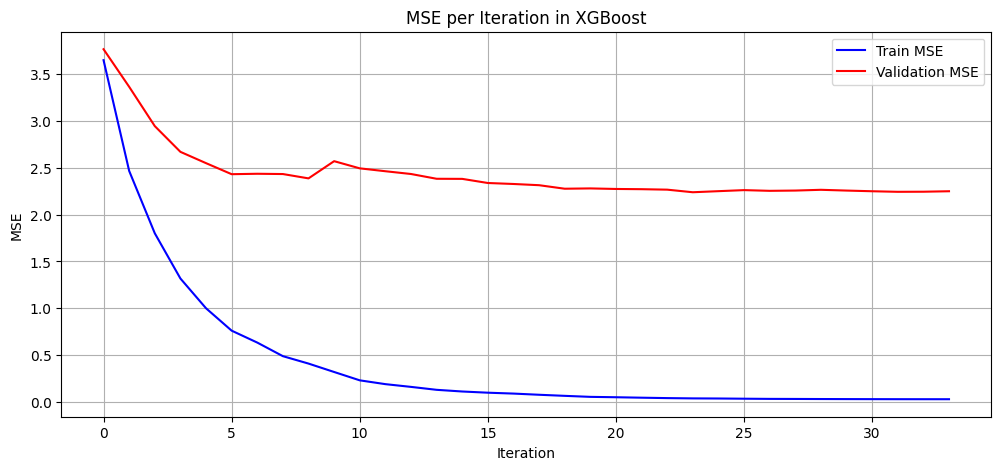

In [35]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
import matplotlib.pyplot as plt

X_train = Data_Training[VarFinales]
y_train = Data_Training['Rendimiento_T_ha']
X_val = Data_Test[VarFinales]
y_val = Data_Test['Rendimiento_T_ha']
# 2. Crear las estructuras de datos de XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# 3. Configuración de parámetros
params = {
    "objective": "reg:squarederror",  # Regresión
    "eval_metric": "rmse",  # RMSE (Raíz del MSE)
    "seed": 42
}

# 4. Entrenar el modelo con evaluación en cada iteración
evals_result = {}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,  # Número de iteraciones
    evals=[(dtrain, "Train"), (dval, "Validation")],  # Evaluación en cada iteración
    early_stopping_rounds=10,  # Detener si no mejora en 10 iteraciones
    evals_result=evals_result,
    verbose_eval=True
)

# 5. Extraer RMSE (Raíz del MSE) por iteración
train_rmse = evals_result["Train"]["rmse"]
val_rmse = evals_result["Validation"]["rmse"]

# Convertir RMSE a MSE (elevar al cuadrado)
train_mse = [x**2 for x in train_rmse]
val_mse = [x**2 for x in val_rmse]

# 6. Graficar MSE por iteración
plt.figure(figsize=(12, 5))
plt.plot(train_mse, label="Train MSE", color="blue")
plt.plot(val_mse, label="Validation MSE", color="red")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE per Iteration in XGBoost")
plt.legend()
plt.grid()

plt.savefig("Iteracion.png", dpi=300, bbox_inches='tight')


plt.show()

## Import Prediction GAM and ELASTIC-NET Models

In [37]:
PredGAM = pd.read_csv('ModeloGAM.csv')
PredElas = pd.read_csv('ModeloElasticNet.csv')

In [38]:
PredGAM = PredGAM['x'].to_numpy()
PredElas = PredElas['lambda.min'].to_numpy()

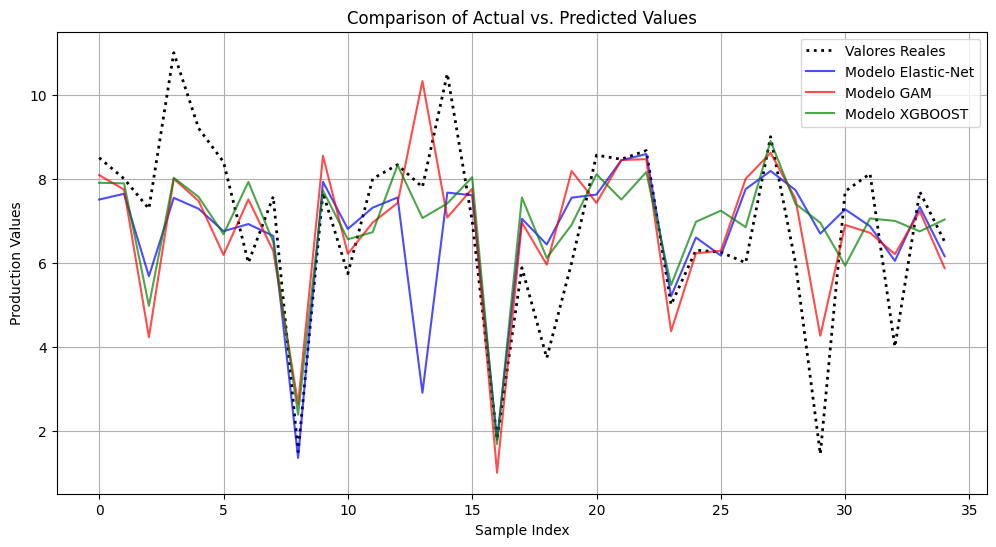

In [39]:
plt.figure(figsize=(12, 6))

# Graficar valores reales
plt.plot(Data_Test['Rendimiento_T_ha'].to_numpy(), label="Valores Reales", color="black", linestyle="dotted", linewidth=2)

# Graficar predicciones de cada modelo
plt.plot(PredElas, label="Modelo Elastic-Net", color="blue", alpha=0.7)
plt.plot(PredGAM, label="Modelo GAM", color="red", alpha=0.7)
plt.plot(y_predTest, label="Modelo XGBOOST", color="green", alpha=0.7)

# Labels and title
plt.xlabel("Sample Index")
plt.ylabel("Production Values")
plt.title("Comparison of Actual vs. Predicted Values")
plt.legend()
plt.grid()

plt.savefig("ComparaciónModelos.png", dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()